<a href="https://colab.research.google.com/github/ShubhamW248/SentimentAnalysis_LSTM_CNN/blob/main/IMDB_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now we try to implement a CNN-LSTM model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping



In [2]:
# Load the dataset
top_words = 5000  # Vocabulary size
max_review_length = 500  # Maximum review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to ensure uniform input length
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Define embedding layer
embedding_vector_length = 128
embedding_layer = Embedding(top_words, embedding_vector_length, input_length=max_review_length)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:

# Define the CNN-LSTM model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stopping])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           41024     
                                                                 
 batch_normalization (Batch  (None, 500, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 64)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 250, 64)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               6

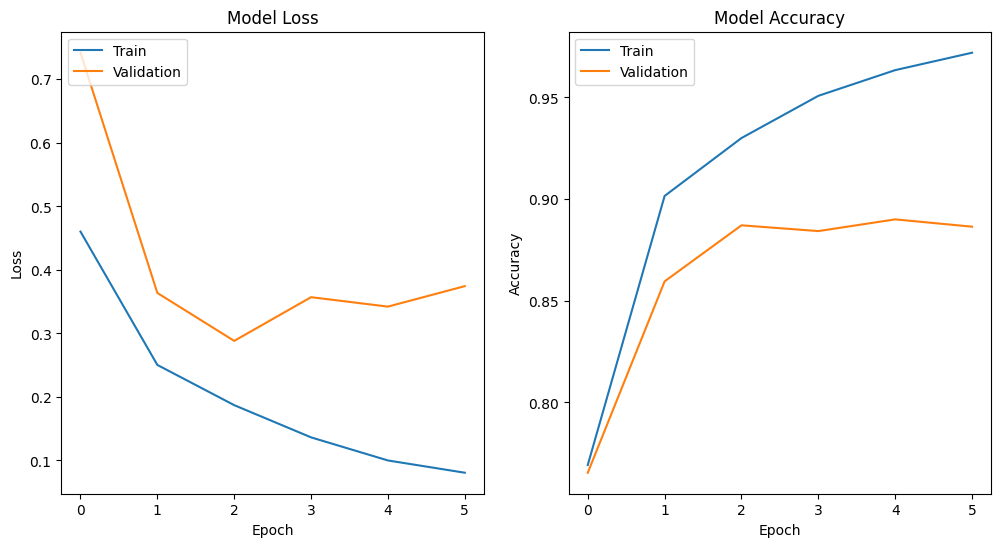

In [4]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [5]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}%")



Accuracy: 88.71%
